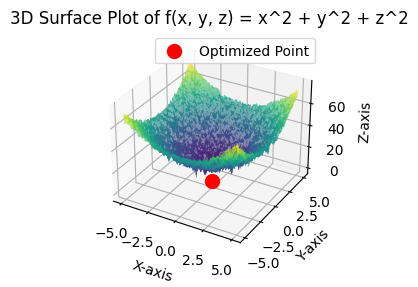

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y, z) = x^2 + y^2 + z^2
def f(x, y, z):
    return x**2 + y**2 + z**2

# Define the gradient function
def gradient_of_f(x, y, z):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        tape.watch(y)
        tape.watch(z)
        result = f(x, y, z)

    gradient_x = tape.gradient(result, x)
    gradient_y = tape.gradient(result, y)
    gradient_z = tape.gradient(result, z)

    del tape  # Release the resources held by the tape

    return gradient_x, gradient_y, gradient_z

# Gradient descent function using TensorFlow
def gradient_descent_tf(initial_guess, learning_rate, num_iterations):
    current_values = tf.Variable(initial_guess, dtype=tf.float32)

    for _ in range(num_iterations):
        with tf.GradientTape() as tape:
            gradient = gradient_of_f(*current_values)

        gradient_array = tf.concat([tf.reshape(g, (1,)) for g in gradient], axis=0)
        current_values.assign_sub(learning_rate * gradient_array)

    return current_values.numpy()

# Create a meshgrid for x, y, z values
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
z_vals = np.linspace(-5, 5, 100)
x_mesh, y_mesh, z_mesh = np.meshgrid(x_vals, y_vals, z_vals)

# Calculate the function values for each point in the meshgrid
f_mesh = f(x_mesh, y_mesh, z_mesh)

# Flatten the meshgrid and function values
x_flat = x_mesh.flatten()
y_flat = y_mesh.flatten()
f_flat = f_mesh.flatten()

# Plot the 3D surface plot of the function
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(x_flat, y_flat, f_flat, cmap='viridis', alpha=0.8)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Surface Plot of f(x, y, z) = x^2 + y^2 + z^2')

# Example usage of gradient descent for optimization
initial_guess_tf = tf.constant([3.0, 1.0, -2.0], dtype=tf.float32)
learning_rate_tf = 0.1
num_iterations_tf = 100

result_tf = gradient_descent_tf(initial_guess_tf, learning_rate_tf, num_iterations_tf)

# Plot the optimized point on the surface plot
ax.scatter(result_tf[0], result_tf[1], f(result_tf[0], result_tf[1], result_tf[2]), color='red', marker='o', s=100, label='Optimized Point')
ax.legend()

# Show the plot
plt.show()
